# Titanic Dataset EDA

In [305]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [178]:
df_titanic.shape

(891, 12)

In [306]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Categorical columns and values

Getting categorical values for columns like Survived, Pclass, Sex, SibSp, Parch, Cabin and Embarked

In [307]:
cat_cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for col in cat_cols:
    print(df_titanic[col].value_counts())
    print('.'*70)
    print(df_titanic[col].value_counts(normalize=True))
    print('='*70)

Survived
0    549
1    342
Name: count, dtype: int64
......................................................................
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
......................................................................
Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64
Sex
male      577
female    314
Name: count, dtype: int64
......................................................................
Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
......................................................................
SibSp
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: proportion, dtype: float64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtyp

<b>normalize = True</b> --> percentage 

In [308]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Dealing with missisng values

Visualising the missing values using a library called sweetviz.

<b>Sweetviz</b> is an open-source Python library that generates beautiful, high-density visualizations to help understand the data. It is a visual analysis library that generates beautiful, high-density visualizations to help understand the data.


In [182]:
# Lets install sweetviz
!pip install sweetviz -q
# -q means quiet mode i.e. no output
import sweetviz as sv
# Analyzing the dataset
report = sv.analyze(df_titanic)
# Display the report
report.show_html('preprofiling_report.html')
print('Sweetviz report generated successfully!')

                                             |          | [  0%]   00:00 -> (? left)

Report preprofiling_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Sweetviz report generated successfully!


Other libraries that do a similar thing:

https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/

https://docs.profiling.ydata.ai/latest/

In [309]:
# Let us investigate the missing values in the dataset in each column
df_titanic.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [310]:
# Lets look at the percentage of missing values in each column
df_titanic.isnull().mean().sort_values(ascending=False) * 100

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

##### Thumb rule to drop a column with missing values - If a column has more than 50% missing values, we can drop the column as it will not add any value to the model. 50% is just a thumb rule, the percentage can vary depending on the dataset and the problem statement.


In [311]:
df_titanic.drop(['Cabin'], axis=1, inplace=True)

df_titanic.isnull().sum().sort_values(ascending=False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

### Filling NA values

1. Filling Emabarked missing values: Using mode to fill.

In [312]:
df_titanic.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [313]:
df_titanic.Embarked.fillna(df_titanic.Embarked.mode()[0], inplace=True)

2. Filling Age missing values: by looking at the age data distribution

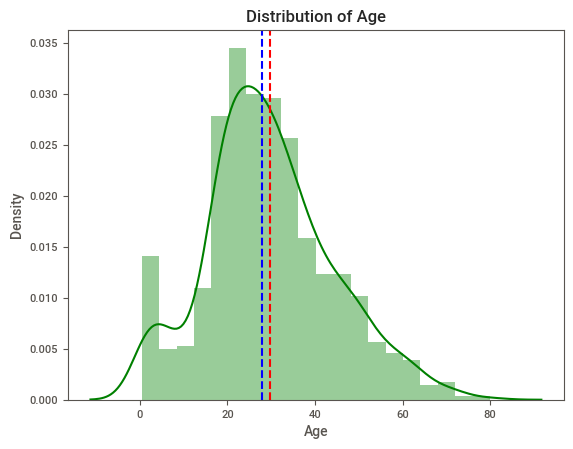

In [188]:
sns.distplot(df_titanic.Age, bins=20, color='g')
plt.axvline(df_titanic.Age.mean(), color='r', linestyle='--', label='Mean Age')
plt.axvline(df_titanic.Age.median(), color='b', linestyle='--', label='Median Age')
plt.title('Distribution of Age')
plt.show()

Mean- Median > 0 but only slightly. This can be confirmed by calculating the skew - 

#####  <b>df['Age'].skew()</b>

In [314]:
df_titanic['Age'].mean() 

29.69911764705882

In [315]:
df_titanic['Age'].skew()

0.38910778230082704

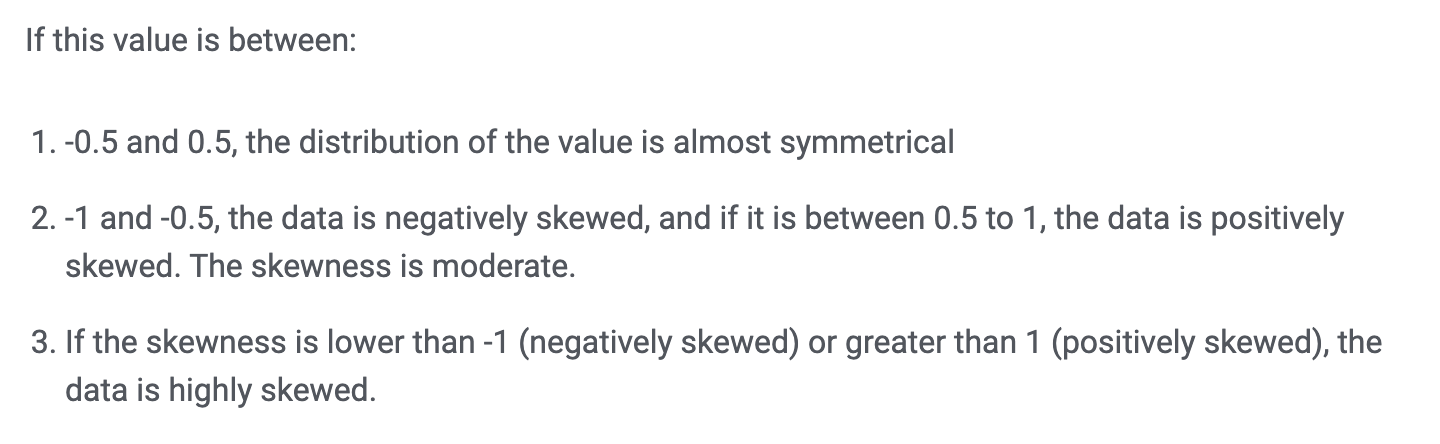

Because the skew value lies between -0.5 and 0.5, we can assume normal distribution and fill the NA values with the mean.

In [316]:
df_titanic ['Age'].fillna(df_titanic['Age'].mean(),inplace=True)

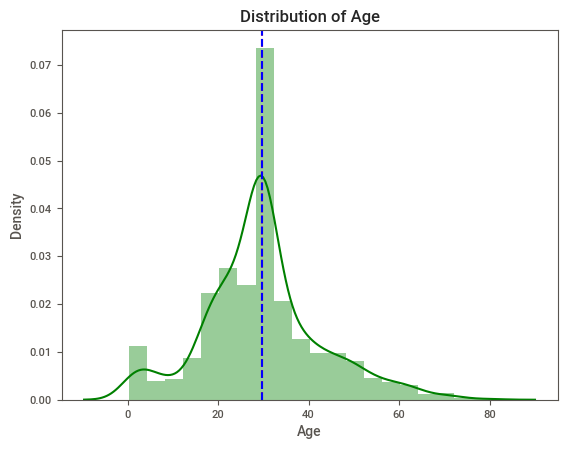

In [192]:
sns.distplot(df_titanic.Age, bins=20, color='g')
plt.axvline(df_titanic.Age.mean(), color='r', linestyle='--', label='Mean Age')
plt.axvline(df_titanic.Age.median(), color='b', linestyle='--', label='Median Age')
plt.title('Distribution of Age')
plt.show()

There is now a <b>central peak</b> because 177 missing values have been filled by the mean, increasing the density of the mean value. Essentially skewing the data. This stratergy is <b>not the best for real life data.</b>

The mean(μ) can have some standard deviation(σ): μ±σ    

In statistics, a set norm is that we can assume that 
    
    68% of the data lies within 1σ of the mean: μ±1σ 
    95% of the data lies within 2σ of the mean: μ±2σ 
    99.7% of the data lies within 3σ of the mean: μ±3σ 
    
![download%20%283%29.png](attachment:download%20%283%29.png)

So instead of filling all the missing values with the mean, we can use numpy's random module to fill random values in the range <b> μ±1σ </b>

In [317]:
print(df_titanic['Age'].mean())
print(df_titanic['Age'].std())

29.69911764705882
13.002015226002884


Therefore, it is better to fill  the values between the range:

In [318]:
print(df_titanic['Age'].mean()-df_titanic['Age'].std())
print(df_titanic['Age'].mean()+df_titanic['Age'].std())

16.697102421055938
42.7011328730617


In [319]:
df_titanic.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

There are  no more missing values. Dataset is ready for analysis.

### Feature Engineering

Feature is the column and engineering is creating i.e, it is the process of creating new or more meaning features from existing features in the data set.

eg: If we have a column called 'Height' and 'Weight', we can create a new column called 'BMI' from the 'Height' and 'Weight' columns.

eg: If we have a column called 'Date of Joining', we can create a new column called 'Experience' from the 'Date of Joining' column.

In [320]:
# Family Size: The number of family members on board
df_titanic['Family_Size'] = df_titanic['SibSp'] + df_titanic['Parch'] + 1   # 1 is added to include the passenger
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [321]:
# isAlone: If the passenger is alone or not
# If the Family_Size is 1, then the passenger is alone, else the passenger is not alone
df_titanic['isAlone'] = np.where(df_titanic['Family_Size'] == 1, 1, 0)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,isAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1


In [322]:
df_titanic.isAlone.value_counts()

isAlone
1    537
0    354
Name: count, dtype: int64

### Data Analysis

1. How many survived ?

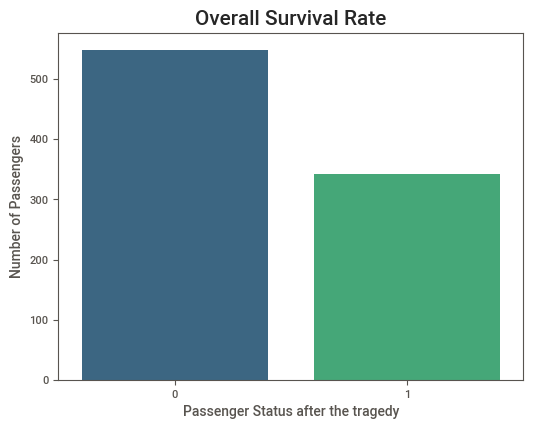

In [323]:
plt.figure(figsize=(6, 4.5))
ax = sns.countplot(x='Survived', data=df_titanic, palette='viridis')
plt.title('Overall Survival Rate', fontsize=15)
plt.xlabel('Passenger Status after the tragedy')
plt.ylabel('Number of Passengers')
plt.show()

Subbing 0 and 1 with "Not survived" and "Survived" using xticks and np.arange

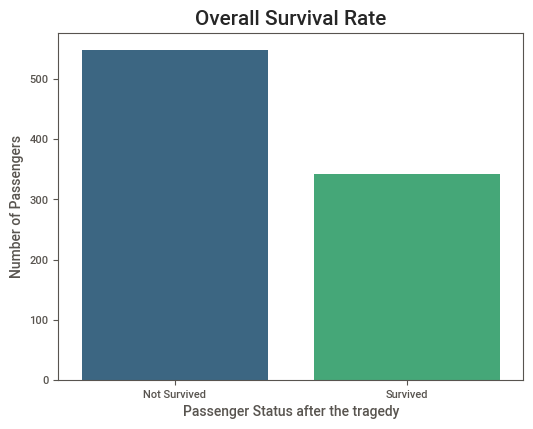

In [200]:
plt.figure(figsize=(6, 4.5))
ax = sns.countplot(x='Survived', data=df_titanic, palette='viridis')

plt.xticks(np.arange(2), ['Not Survived', 'Survived'])
plt.title('Overall Survival Rate', fontsize=15)
plt.xlabel('Passenger Status after the tragedy')
plt.ylabel('Number of Passengers')
plt.show()

Annotating the plot with <b>ax.text</b>

Syntax: 

##### <b>ax.text(category, y,str(y),ha=location, color)</b>

Survived
0    549
1    342
Name: count, dtype: int64
0
549
1
342


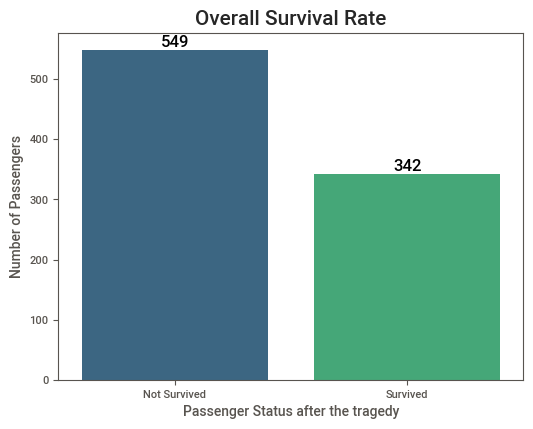

In [201]:
plt.figure(figsize=(6, 4.5))
ax = sns.countplot(x='Survived', data=df_titanic, palette='viridis')

plt.xticks(np.arange(2), ['Not Survived', 'Survived'])
plt.title('Overall Survival Rate', fontsize=15)
plt.xlabel('Passenger Status after the tragedy')
plt.ylabel('Number of Passengers')

# Annotated the plot
labels = (df_titanic['Survived'].value_counts())
print(labels)
for i, v in enumerate(labels):
    print(i)
    print(v)
    #ax.text(category, y,str(y),ha=location, color)
    ax.text(i, v + 5, str(v), ha = 'center', color = 'black', size = 12, fontweight = 'bold')

plt.show()

2. Let us find out how many passengers survived by Pclass

In [202]:
df_titanic.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

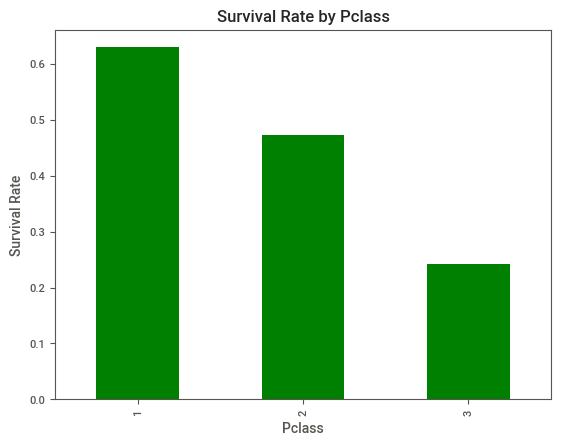

In [324]:
df_titanic.groupby(['Pclass'])['Survived'].mean().plot(kind='bar', color='g')
plt.title('Survival Rate by Pclass')
plt.ylabel('Survival Rate')
plt.show()

First class passengers had a higher survival rate compared to the second and third class passengers.

3. Let us find out how many passengers survived by Sex

In [204]:
df_titanic.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

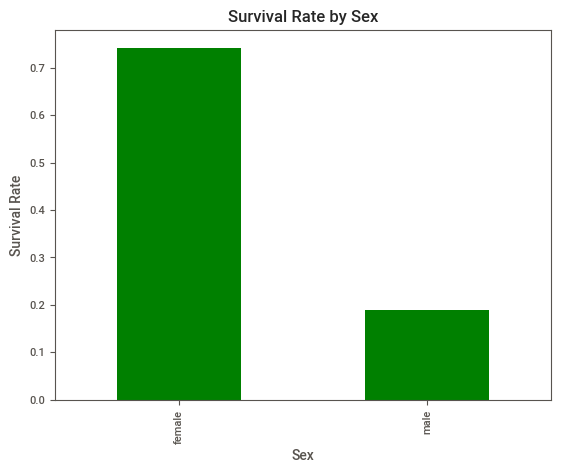

In [205]:
df_titanic.groupby(['Sex'])['Survived'].mean().plot(kind='bar', color='g')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

Females had a higher survival rate compared to Male passengers.

4. Let us find out how many passengers survived by Embarked

In [206]:
df_titanic.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

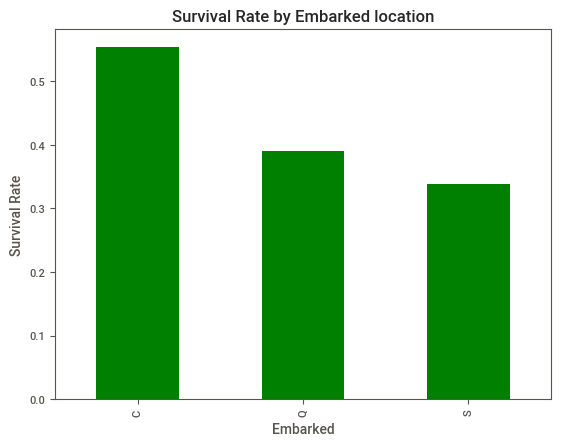

In [207]:
df_titanic.groupby(['Embarked'])['Survived'].mean().plot(kind='bar', color='g')
plt.title('Survival Rate by Embarked location')
plt.ylabel('Survival Rate')
plt.show()

Passengers who embarked from Cherbourg had a higher survival rate compared to passengers who embarked from Queenstown and Southampton.

5. Lets find out how many children survived by GenderClass

In [325]:
df_titanic["GenderClass"] = df_titanic.apply(lambda x: 'child' if x['Age'] < 15 else x['Sex'], axis=1)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,isAlone,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,male


In [209]:
df_titanic.GenderClass.value_counts()

GenderClass
male      538
female    275
child      78
Name: count, dtype: int64

In [210]:
df_titanic.groupby(['GenderClass'])['Survived'].mean()

GenderClass
child     0.576923
female    0.760000
male      0.163569
Name: Survived, dtype: float64

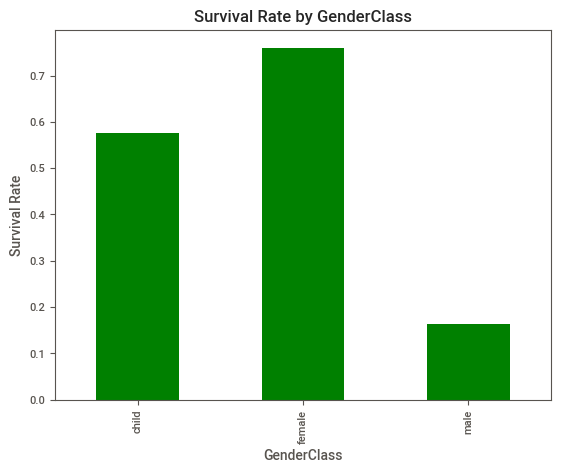

In [211]:
df_titanic.groupby(['GenderClass'])['Survived'].mean().plot(kind='bar', color='g')
plt.title('Survival Rate by GenderClass')
plt.ylabel('Survival Rate')
plt.show()

Children had a higher survival rate compared to males.

6. Finding out the title of the passengers

In [326]:
df_titanic['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [327]:
titles=[]
for name in df_titanic['Name']:
    #print(name.split(",")[1])
    titles.append(name.split(",")[1].split(".")[0].strip()) #title
print(set(titles))

{'Ms', 'Mme', 'Sir', 'Don', 'Lady', 'Jonkheer', 'Col', 'the Countess', 'Master', 'Miss', 'Major', 'Rev', 'Mr', 'Dr', 'Mrs', 'Mlle', 'Capt'}


In [328]:
df_titanic['Title'] =df_titanic['Name'].apply(lambda x: x.split(",")[1].strip().split(".")[0])
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,isAlone,GenderClass,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,male,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,female,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,female,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,female,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,male,Mr


Doing the same but using regex:


In [330]:
df_titanic["Title_regexp"] = df_titanic["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
# https://www.w3schools.com/python/python_regex.asp
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,isAlone,GenderClass,Title,Title_regexp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,male,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,female,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,female,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,female,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,male,Mr,Mr


In [331]:
# Drop the"Title_regexp" column
df_titanic.drop(['Title_regexp'], axis=1, inplace=True)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,isAlone,GenderClass,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,male,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,female,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,female,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,female,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,male,Mr


In [217]:
df_titanic.Title.value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [332]:
# Dictionary to map uncommon titles to common categories
title_mapping = {
    "Mr": ["Rev", "Major", "Col", "Capt", "Don", "Sir", "Jonkheer"],
    "Miss": ["Mlle", "Ms"],
    "Mrs": ["Dr","Mme", "the Countess", "Lady"],
    "Master": []
}

# Function to map titles
def map_title(title):
    for common_title, titles in title_mapping.items():
        if title in titles:
            return common_title
    return title  # If title is already in the main category, keep it

# Assuming your dataset has a 'Title' column extracted
df_titanic["Title"] = df_titanic["Title"].apply(map_title)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,isAlone,GenderClass,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,male,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,female,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,female,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,female,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,male,Mr


In [333]:
df_titanic.Title.value_counts()

Title
Mr        531
Miss      185
Mrs       135
Master     40
Name: count, dtype: int64

Most passengers had the title 'Mr' followed by 'Miss', 'Mrs' and 'Master'.

7. How many passengers paid zero fare?

In [334]:
df_titanic[df_titanic['Fare'] == 0].count()[0]


15

The same can be done using <b>shape</b>

In [335]:
df_titanic[df_titanic['Fare'] == 0].shape[0]

15

In [336]:
df_titanic[df_titanic['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,isAlone,GenderClass,Title
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,S,1,1,male,Mr
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,S,1,1,male,Mr
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,S,1,1,male,Mr
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.699118,0,0,239853,0.0,S,1,1,male,Mr
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,S,1,1,male,Mr
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.699118,0,0,239853,0.0,S,1,1,male,Mr
466,467,0,2,"Campbell, Mr. William",male,29.699118,0,0,239853,0.0,S,1,1,male,Mr
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.699118,0,0,239854,0.0,S,1,1,male,Mr
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,S,1,1,male,Mr
633,634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0,S,1,1,male,Mr


There were 15 passengers who paid zero fare.

These seem to be crew members or staff members who were working on the ship.

# Logistic Regressor model

In [337]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,isAlone,GenderClass,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,2,0,male,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,2,0,female,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,1,female,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,2,0,female,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,1,male,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1,1,male,Mr
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1,1,female,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,4,0,female,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,1,male,Mr


In [338]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family_Size', 'isAlone',
       'GenderClass', 'Title'],
      dtype='object')

#### Dropping columns that are not useful for prediction/training the model like PassengerId, Name, SibSp. Parch, Sex, Ticket

Machine learning does not like duplicate data, which is why we dropped Sex, because we already have Genderclass. Another 

In [339]:
cols_to_drop=['PassengerId', 'Name', 'Sex', 'SibSp',
       'Parch', 'Ticket']
df_titanic.drop(cols_to_drop,axis=1,inplace=True)
df_titanic.head()

,Survived,Pclass,Age,Fare,Embarked,Family_Size,isAlone,GenderClass,Title
0,0,3,22.0,7.2500,S,2,0,male,Mr
1,1,1,38.0,71.2833,C,2,0,female,Mrs
2,1,3,26.0,7.9250,S,1,1,female,Miss
3,1,1,35.0,53.1000,S,2,0,female,Mrs
4,0,3,35.0,8.0500,S,1,1,male,Mr


### One hot encoding (OHE)

Machine learning algorithms only work with numeric values. Therefore it cannot understand columns like Embarked, Genderclass and Title which are strings. Therefore, for ML to work with these data, we use one hot encoding, which converts string to numeric value 1 or 0. 


Embarked has 3 possible values - S, C, Q

What OHE does is splits Embarked into 3 columns - Embarked_S, Embarked_C and Embarked_Q. So if someone embarked in S, then Embarked_S is 1 and Embarked_C and Embarked_Q are set to 0. However as established ML doesn't like duplicate data, one of these 3 columns are dropped, because if Embarked_S and Embarked_Q are 0 then it implies Embarked_C is 1. So OHE drops one column. 

Same for all the other categorical columns. So basic rule of OHE is <b>if there are n categorical value then thorugh OHE n-1 columns are created for ML. </b>

In [340]:
columns_to_ohe = ["Embarked", "GenderClass", "Title"]
df_titanic = pd.get_dummies(df_titanic, columns=columns_to_ohe, drop_first=True, dtype=int)
df_titanic.head()

,Survived,Pclass,Age,Fare,Family_Size,isAlone,Embarked_Q,Embarked_S,GenderClass_female,GenderClass_male,Title_Miss,Title_Mr,Title_Mrs
0,0,3,22.0,7.2500,2,0,0,1,0,1,0,1,0
1,1,1,38.0,71.2833,2,0,0,0,1,0,0,0,1
2,1,3,26.0,7.9250,1,1,0,1,1,0,1,0,0
3,1,1,35.0,53.1000,2,0,0,1,1,0,0,0,1
4,0,3,35.0,8.0500,1,1,0,1,0,1,0,1,0


#### Split the dataset into X and y

In [341]:
X = df_titanic.drop(['Survived'], axis=1)
y = df_titanic['Survived']

X.head()

,Pclass,Age,Fare,Family_Size,isAlone,Embarked_Q,Embarked_S,GenderClass_female,GenderClass_male,Title_Miss,Title_Mr,Title_Mrs
0,3,22.0,7.2500,2,0,0,1,0,1,0,1,0
1,1,38.0,71.2833,2,0,0,0,1,0,0,0,1
2,3,26.0,7.9250,1,1,0,1,1,0,1,0,0
3,1,35.0,53.1000,2,0,0,1,1,0,0,0,1
4,3,35.0,8.0500,1,1,0,1,0,1,0,1,0


####  Train Test Split

In [342]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   
# Print the shapes of the training and testing datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 12)
(179, 12)
(712,)
(179,)


In [274]:
X_train.head()

,Pclass,Age,Fare,Family_Size,isAlone,Embarked_Q,Embarked_S,GenderClass_female,GenderClass_male,Title_Miss,Title_Mr,Title_Mrs
331,1,45.5,28.5000,1,1,0,1,0,1,0,1,0
733,2,23.0,13.0000,1,1,0,1,0,1,0,1,0
382,3,32.0,7.9250,1,1,0,1,0,1,0,1,0
704,3,26.0,7.8542,2,0,0,1,0,1,0,1,0
813,3,6.0,31.2750,7,0,0,1,0,0,1,0,0


<b> Standardize the data </b>

In [343]:
numeric_cols = ['Age', 'Fare']
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train[numeric_cols] = ss.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = ss.transform(X_test[numeric_cols])

In [276]:
X_train.head()

,Pclass,Age,Fare,Family_Size,isAlone,Embarked_Q,Embarked_S,GenderClass_female,GenderClass_male,Title_Miss,Title_Mr,Title_Mrs
331,1,1.229207,-0.078684,1,1,0,1,0,1,0,1,0
733,2,-0.503505,-0.377145,1,1,0,1,0,1,0,1,0
382,3,0.189580,-0.474867,1,1,0,1,0,1,0,1,0
704,3,-0.272477,-0.476230,2,0,0,1,0,1,0,1,0
813,3,-1.812666,-0.025249,7,0,0,1,0,0,1,0,0


<b>Building the model</b>: Since the prediction can be either survived or not, we can use Logistic Regression.

In [344]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)


<b> Calculating the accuracy of the model using accuracy_score and confusion matrix</b>

In [345]:
# Lets calculate the accuracy of the model
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print("Training Accuracy:", acc_train)
print("Testing Accuracy:", acc_test)

Training Accuracy: 0.8356741573033708
Testing Accuracy: 0.7988826815642458


# Deploying the model

In [345]:
import joblib
joblib.dump(logreg, 'titanic_model.pkl')
joblib.dump(ss, 'titanic_scaler.pkl')
print("Model is saved successfully!")

Training Accuracy: 0.8356741573033708
Testing Accuracy: 0.7988826815642458
